<a href="https://colab.research.google.com/github/awildt01/Airbnb_Berlin-/blob/main/Airbnb_(Berlin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


### Analyse der Airbnb-Daten - Berlin
Für dieses Projekt analysieren wir die Daten der Stadt Berlin aus dem Airbnb von 2012 bis 2023. Berlin ist nicht nur die berühmteste Stadt Europas, sondern auch das weltweit wichtigste Ziel für Besucher, die von ihren Museen, Unterhaltung, Restaurants und Geschäften angezogen werden. Laut den Tourismusbehörden des Landes Berlin verzeichnete Berlin im Jahr 2023 5,7 Millionen Besucher.

Die Analyse von Tausenden von Anzeigen, die über Airbnb bereitgestellt werden, ist ein entscheidender Faktor für das Unternehmen. Unser Hauptziel ist es, die wichtigsten Metriken zu ermitteln, die die Auflistung von Immobilien auf der Plattform beeinflussen. Zu diesem Zweck werden wir den Airbnb-Datensatz in Berlin mithilfe grundlegender Techniken der explorativen Datenanalyse (EDA) erkunden und visualisieren. Wir haben die Verteilung jeder Airbnb-Anzeige basierend auf ihrer Lage, einschließlich Preisbereich, Zimmertyp, Anzeigenname und anderen relevanten Faktoren, entdeckt. Wir haben diesen Datensatz aus verschiedenen Blickwinkeln analysiert und interessante Erkenntnisse gewonnen. Dies kann dem Marketingteam, dem Finanzteam und dem technischen Team von Airbnb bei datenbasierten strategischen Entscheidungen helfen.


// //



<center><img alt="Analisando Airbnb" width="100%" src="https://www.urlaubstracker.de/wp-content/uploads/2018/12/berlin-fernsehturm.jpg"></center>

// //

## Wir werden eine Explorative Datenanalyse führen und Erkenntnisse zu folgenden Themen gewinnen:

1. Welche Art von Immobilien wird auf Airbnb am häufigsten vermietet?
2. Was ist der Durchschnittspreis für Mieten?
3. Eigentum: Gehören die Immobilien einzelnen Benutzern oder gibt es Benutzer mit mehreren Mietobjekten (potenziell für Spekulation)?
4.  Welcher Ort ist im Datensatz am teuersten?
5.  Was ist der Durchschnitt der Mindestaufenthaltsdauer für Mietwohnungen (minimum_nights)?
6. Welche Stadtteil hat die meisten Anzeigen und Angebote?
7. Ist der Zustrom von Touristen saisonal, folgt er also einem saisonalen Trend? Können wir das Muster erklären?



## Beschaffung der Daten
Alle hier verwendeten Daten wurden von der Website Inside Airbnb bezogen.

Für diese anfängliche explorative Analyse wird nur die folgende Datei heruntergeladen:

- listings.csv - Zusammenfassende Informationen und Metriken für Angebote in Berlin (geeignet für Visualisierungen).
Wichtig:  Die Website entwickelt sich ständig weiter, und es kann sein, dass zu einem bestimmten Zeitpunkt der genaue Datensatz, der in diesem Notebook verwendet wird, nicht mehr verfügbar ist, was unseren Code beeinträchtigen würde.

Mit diesem Gedanken im Hinterkopf stellen wir hier den von uns verwendeten Datensatz zur Verfügung, damit Sie dieses Material immer nutzen können.

Mit diesen Informationen beginnen wir das Projekt.

In [1]:
# importar os pacotes necessarios
# https://medium.com/@alexandrewildtgraziani/analyse-der-airbnb-berlin-b002125a56f9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
from folium import plugins
import folium
warnings.filterwarnings("ignore")

%matplotlib inline



In [2]:
# importar o arquivo listings.csv para um DataFrame
data = "/content/listings.csv"
df_berlin = pd.read_csv(data)


## Analyse der Daten

Dieser Schritt hat zum Ziel, einen ersten Überblick zu schaffen und das Verständnis für die Datenstruktur zu ermöglichen."


**Wörterbuch der Variablen"**

* `id` - Identifikationsnummer, die zur Identifizierung der Immobilie generiert wurde.
* `name`  - Name der angekündigten Immobilie.
* `host_id`- Identifikationsnummer des Eigentümers (Gastgebers) der Immobilie.
* `host_name`  - Name des Gastgebers.
* `neighbourhood_group` - Name der Nachbarschaftsgruppe.
* `neighbourhood` - Die Gruppe der Nachbarschaft innerhalb des Viertels, die mit Breiten- und Längengraden in Bezug auf die Nachbarschaften geokodiert ist.
* `latitude`- Koordinate der Breitengrade der Immobilie.
* `longitude`- Koordinate der Längengrade der Immobilie.
* `room_type` - gibt an, welche Art von Zimmer angeboten wird.
* `price` - Preis für die Vermietung der Immobilie.
* `minimum_nights`- Mindestanzahl der Übernachtungen für eine Buchung.
* `number_of_reviews` - Anzahl der Bewertungen, die die Immobilie erhalten hat.
* `last_review`  - Datum der letzten Bewertung.
* `reviews_per_month` - Anzahl der Bewertungen pro Monat.
* `calculated_host_listings_count`  - Anzahl der Immobilien desselben Gastgebers.
* `availability_365` - Anzahl der verfügbaren Tage innerhalb von 365 Tagen.
* `number_of_reviews_ltm`- die Anzahl der Bewertungen, die die Auflistung in den letzten 12 Monaten erhalten hat.
* `license`- Lizenzen, die gesetzlich für bestimmte Kurzzeitmieten erforderlich sind.



In [3]:
# Die erste Übersicht des Datensatzes.

df_berlin.head(1)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3176,Rental unit in Berlin · ★4.63 · 1 bedroom · 2 ...,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53471,13.4181,Entire home/apt,83.0,63.0,148.0,2023-05-25,0.87,1.0,80.0,1.0,First name and Last name: Nicolas Krotz Conta...


In [ ]:
# df_berlin.tail(1)

In [4]:

df_berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8996 entries, 0 to 8995
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8996 non-null   int64  
 1   name                            8996 non-null   object 
 2   host_id                         8996 non-null   int64  
 3   host_name                       8986 non-null   object 
 4   neighbourhood_group             8995 non-null   object 
 5   neighbourhood                   8995 non-null   object 
 6   latitude                        8995 non-null   float64
 7   longitude                       8995 non-null   float64
 8   room_type                       8995 non-null   object 
 9   price                           8995 non-null   float64
 10  minimum_nights                  8995 non-null   float64
 11  number_of_reviews               8995 non-null   float64
 12  last_review                     78

### **F1. Wie viele Attribute (Variablen) und wie viele Datensätze hat unser Datensatz? Welche Arten von Variablen gibt es?**
- Die Daten enthalten 12.472 Zeilen und 18 Spalten.
- Es gibt nur 2 Arten von Variablen: "Objekt" und "Float". Allerdings könnten  - die Variablen "neighbourhood," "neighbourhood_group" und "room_type" in der   Zukunft als kategorisch behandelt werden.
"last_review" ist vom Typ "Datetime".



In [5]:
# Untersuchung von Spalten und Zeile
print('{} Zeile'.format(df_berlin.shape[0]))
print('{} Spalte'.format(df_berlin.shape[1]))
print('--------')

# Datatypen
display(df_berlin.dtypes)
print('--------')

print('Art von Immobilien:')
lista = df_berlin.room_type.unique()
for room in lista:
  print(room)
print('--------')
print('Nr Orte: {}'.format(len(df_berlin.neighbourhood.unique())))
print('--------')
print('Nr Viertel: {}'.format(len(df_berlin.neighbourhood_group.unique())))



8996 Zeile
18 Spalte
--------


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
dtype: object

--------
Art von Immobilien:
Entire home/apt
Private room
Shared room
Hotel room
nan
--------
Nr Orte: 137
--------
Nr Viertel: 13


### **F2. Prozentsatz der fehlenden Werte im *Datensatz*?**

Die Qualität eines Datensatzes ist direkt mit der Anzahl der fehlenden Werte verbunden. Es ist wichtig, von Anfang an zu verstehen, ob diese Nullwerte im Vergleich zur Gesamtzahl der Einträge signifikant sind.

- Es ist festzustellen, dass die Spalte "License" 53% ihrer Werte fehlen.
- Die Variablen "reviews_per_month" und "last_review" haben fehlende Werte von 19%.
- Die Variable "host_name" hat ungefähr 0,08% fehlende Werte."

In [6]:
# Fehlenden Werten in absteigender Reihenfolge

total_missingvalues = sum(df_berlin.isnull().sum())
Gesamtwerte = df_berlin.shape[0] * 18

print('Gesamtanzahl fehlender Werte {}'.format(sum(df_berlin.isnull().sum())))
print('Prozentsatz fehlender Werte im Verhältnis zum Gesamten {:.2f} %'.format(total_missingvalues/ Gesamtwerte*100) )
print('')
print('Fehlende Werte pro Spalte ')
print('')
print(df_berlin.isnull().sum().sort_values(ascending=False))
print(' ')
print('Fehlende Werte pro Spalte %')
print(' ')
print('{}%'.format((df_berlin.isnull().sum() / df_berlin.shape[0]*100).sort_values(ascending=False)))
print('')


Gesamtanzahl fehlender Werte 7712
Prozentsatz fehlender Werte im Verhältnis zum Gesamten 4.76 %

Fehlende Werte pro Spalte 

license                           5441
reviews_per_month                 1125
last_review                       1125
host_name                           10
minimum_nights                       1
number_of_reviews_ltm                1
availability_365                     1
calculated_host_listings_count       1
number_of_reviews                    1
price                                1
room_type                            1
longitude                            1
latitude                             1
neighbourhood                        1
neighbourhood_group                  1
name                                 0
host_id                              0
id                                   0
dtype: int64
 
Fehlende Werte pro Spalte %
 
license                           60.482437
reviews_per_month                 12.505558
last_review                       12.505

Heatmap der fehlenden Werte


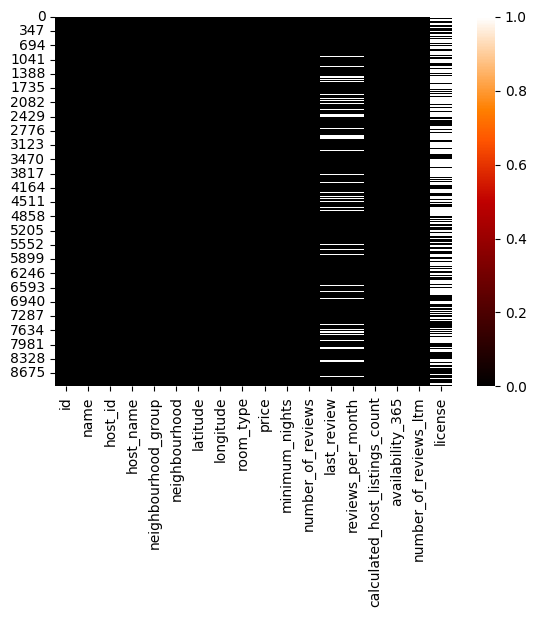

In [7]:
# Heatmap der fehlenden Werte
print('Heatmap der fehlenden Werte')
sns.heatmap(df_berlin.isnull(),cmap='gist_heat');

### **F3. Welche Art von Verteilung haben die Variablen?**
Um die Verteilung der Numerische Variablen zu identifizieren, werde ich ein Histogramm erstellen.

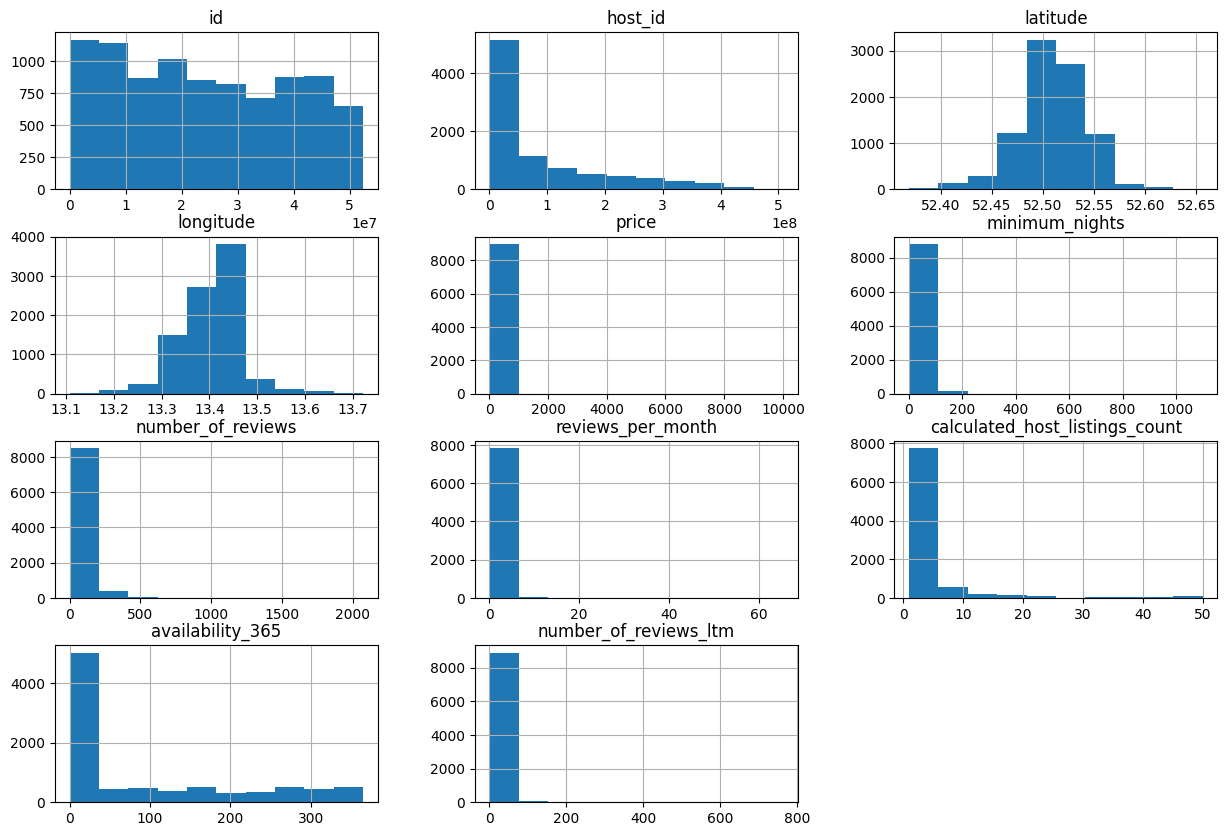

In [8]:
df_berlin.hist(figsize=(15,10));



### **F4. Gibt es Ausreißer ?**

#### **Warum sollten Sie sich um Ausreißer sorgen ?** ###

Das Beibehalten von Ausreißern in Ihrem Datensatz kann dazu führen, dass Ihr Modell überangepasst wird (zu präzise).
Das Entfernen aller Ausreißer kann zu einer übermäßigen Generalisierung Ihres Modells führen (es wird nicht gut auf ungewöhnliche Daten reagieren). Wie immer ist es am besten, iterativ zu experimentieren, um die beste Methode zum Umgang
mit Ausreißern zu finden.


Durch die Verteilung im Histogramm können Hinweise auf das Vorhandensein von Ausreißern gefunden werden. Betrachten Sie beispielsweise die Variablen Preis (price), Mindestanzahl der Nächte (minimum_nights) und Anzahl der angebotenen Immobilien eines Gastgebers (calculated_host_listings_count).

Die Werte folgen keiner normalen Verteilung und verzerren die gesamte graphische Darstellung. Um diesen Verdacht zu bestätigen, gibt es zwei schnelle Methoden zur Identifikation von Ausreißern:

- Statistische Zusammenfassung durch die Methode "describe()".
- Darstellung von Boxplots für die Variable.

In [9]:
#Statistische Zusammenfassung der numerischen Variablen liefern,
# print(df.dtypes)

df_berlin[['price','minimum_nights',
  'number_of_reviews','reviews_per_month', 'calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8995.000000,8995.000000,8995.000000,7871.000000,8995.000000,8995.000000,8995.000000
mean,107.177877,52.250139,46.980434,0.899311,3.699611,91.663924,10.038799
std,219.433202,57.882649,89.493483,1.748520,7.702599,120.174228,22.931799
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,45.000000,3.000000,2.000000,0.090000,1.000000,0.000000,0.000000
50%,71.000000,92.000000,11.000000,0.320000,1.000000,9.000000,0.000000
75%,123.000000,92.000000,51.000000,1.130000,2.000000,176.000000,11.000000
max,9999.000000,1100.000000,2074.000000,65.330000,50.000000,365.000000,764.000000


**Betrachtet man die obige statistische, können wir Zusammenfassung:**

- Die Variable "price" hat 75% der Werte unter 140, aber ihr maximaler Wert beträgt 9999.0. Ausreißern ?
- Die Variable "price" hat eine hohe Standardabweichung (std), Was auf das Vorhandensein von Ausreißern hinweisen kann.
- Die maximale Anzahl von Nächten ("minimum_nights") liegt über 1.100 Tagen pro Jahr. Was ungewöhnlich ist
- Der Median von "minimum_nights" beträgt 7 Nächte.
- Der Durchschnitt der maximalen Anzahl von Nächten ("minimum_nights") beträgt 44 Nächte.
- Die Variable "availability_365" zeigt eine maximale Verfügbarkeit von 365 Tagen an. In Berlin ist es jedoch nur erlaubt, private Apartments für bis zu 90 Tage zu vermieten.




#### **Ausreißer Untersuchung**



- Untersuchung der Ausreißer und die Verhältnisse über die gesamte Dataset.
- Untersuchung von den Anzahl von Ausreißern für die Spalten minimum_nights und price


**Boxplot vom  minimum_nights**

<Axes: >

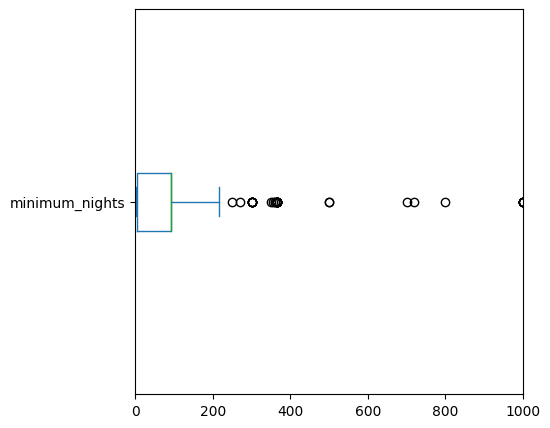

In [10]:
df_berlin.minimum_nights.plot(kind='box',vert=False, xlim=(0,1000),figsize=(5,5))

In [11]:
# minimum_nights
# Anzahl der Werte über 200 Nächte für minimum_nights anzeigen

print("Übernachtung über 200 Nächte")
print("Anzahl der Datensätze über 200 Nächte:",len(df_berlin[df_berlin.minimum_nights > 200]))
print("Anzahl der gelöschten Datensätze im Verhältnis zum gesamten Datensatz: {:.4f} % ".format(len(df_berlin[df_berlin.minimum_nights > 200]) / df_berlin.shape[0] *100))



Übernachtung über 200 Nächte
Anzahl der Datensätze über 200 Nächte: 36
Anzahl der gelöschten Datensätze im Verhältnis zum gesamten Datensatz: 0.4002 % 


**Boxplot para price**

- Untersuchung der Ausreißer und die Verhältnisse über die gesamte Dataset.
- Untersuchung von den Anzahl von Ausreißern für die Spalten price


Price: Werte über de 250 Euros 
Anzahl der Datensätze über 250 Euros: 570 
Anzahl der gelöschten Datensätze im Verhältnis zum gesamten Datensatz: 6.34% 


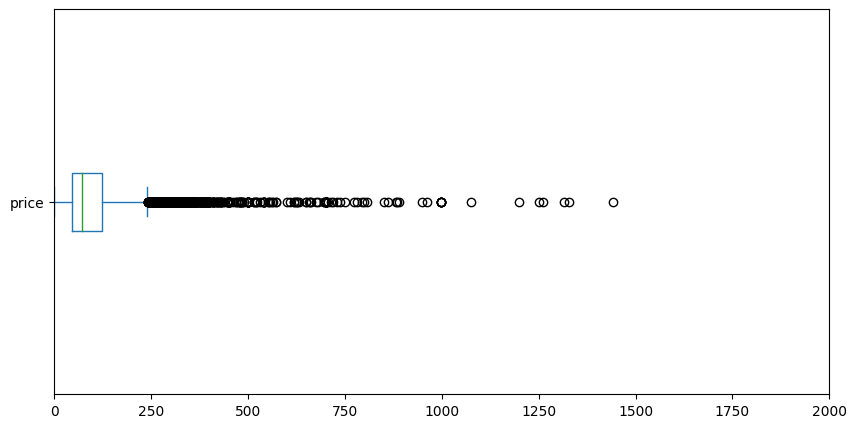

In [12]:
df_berlin.price.plot(kind='box', vert=False,figsize=(10,5), xlim=(0,2000))

print("\nPrice: Werte über de 250 Euros ")
print('Anzahl der Datensätze über 250 Euros: {} '.format(len(df_berlin[df_berlin.price > 250])))
print('Anzahl der gelöschten Datensätze im Verhältnis zum gesamten Datensatz: {:.2f}% '.format(len(df_berlin[df_berlin.price > 250]) / df_berlin.shape[0]*100))


## Entfernen von Ausreißern

Um mit den Ausreißern in diesem Datensatz umzugehen, werden wir die statistische Verteilung analysieren, Boxplots erstellen und die Grenzwerte mithilfe der IQR-Score-Regel berechnen.

Der IQR wird berechnet, indem der dritte Quartil (75%) vom ersten Quartil (25%) subtrahiert wird.

# IQR = Q3 - Q1
* Setzen Q1 und Q3 für die Variablen fest, die bereinigt werden sollen.
* Berechnen den IQR für die Variablen.
* Die oberen und unteren Grenzwerte werden festgelet, um die Ausreißer zu entfernen.
* Ausreißer Entfernen.

In [ ]:
q1_price = df_berlin.price.quantile(.25)
q3_price = df_berlin.price.quantile(.75)
IQR_price = q3_price - q1_price

print('IQR (Interquartilbereich) für die Variable "price": ', IQR_price)

# Festlegung der Grenzwerte
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Die obere Grenze für den Preis (price): ', sup_price)
print('Die untere Grenze für den Preis (price): ', inf_price)




IQR (Interquartilbereich) für die Variable "price":  60.0
Die obere Grenze für den Preis (price):  190.0
Die untere Grenze für den Preis (price):  -50.0


**Lassen Sie uns ein Boxplot erstellen, um den Unterschied durch die Bereinigung zu visualisieren.**

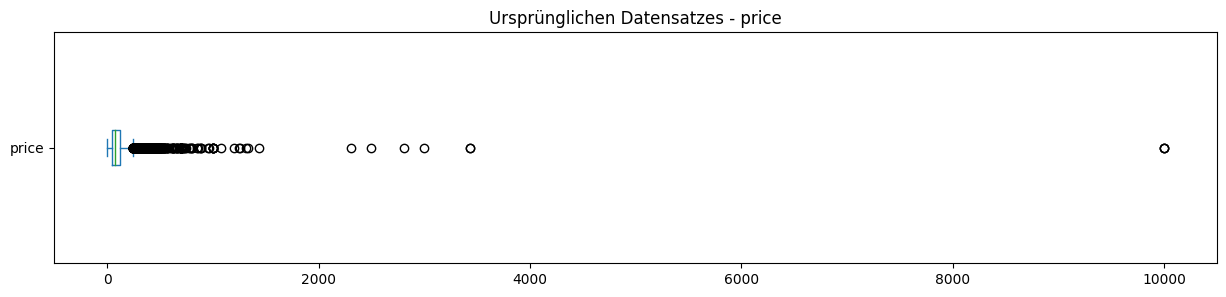

Der Datensatz hat 8996 Spalten.
459 Einträge über 275.0 Euro
Sie repräsentieren 5.10% des Datensatzes.


In [13]:
# Überprüfung des ursprünglichen Datensatzes

fig, ax = plt.subplots(figsize=(15,3))
df_berlin.price.plot(kind='box', vert=False);
ax.set_title('Ursprünglichen Datensatzes - price')
plt.show()

print("Der Datensatz hat {} Spalten.".format(df_berlin.shape[0]))
print("{} Einträge über 275.0 Euro".format(len(df_berlin[df_berlin.price > 275])))
print("Sie repräsentieren {:.2f}% des Datensatzes.".format((len(df_berlin[df_berlin.price > 275]) / df_berlin.shape[0])*100))

In [14]:
# Identifizieren der Ausreißer für die Variable "minimum_nights"

q1_minimum_nights = df_berlin.minimum_nights.quantile(.25)
q3_minimum_nights = df_berlin.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights

print('IQR da variable minimum_nights:', IQR_minimum_nights)

# Festlegung der Grenzwerte für minimum_nights

sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Die obere Grenze für die Variable "minimum_nights": ', sup_minimum_nights)
print('Die untere Grenze für die Variable "minimum_nights": ', inf_minimum_nights)

IQR da variable minimum_nights: 89.0
Die obere Grenze für die Variable "minimum_nights":  225.5
Die untere Grenze für die Variable "minimum_nights":  -130.5


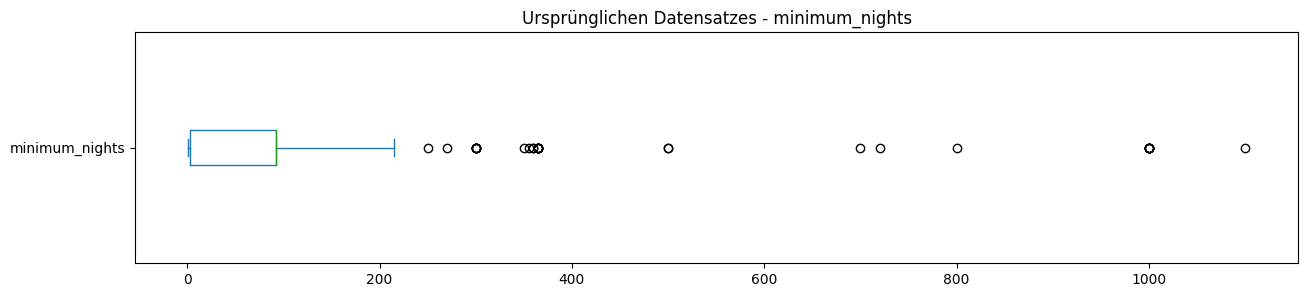

Der Datensatz hat 8996 Spalten.
Einträge über 227 34 
Sie repräsentieren 0.38% des Datensatzes.


In [15]:
# Überprüfung des ursprünglichen Datensatzes

fig, ax = plt.subplots(figsize=(15,3))
df_berlin.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Ursprünglichen Datensatzes - minimum_nights')
plt.show()
print("Der Datensatz hat {} Spalten.".format(df_berlin.shape[0]))
print("Einträge über 227 {} ".format(len(df_berlin[df_berlin.minimum_nights > 227])))
print("Sie repräsentieren {:.2f}% des Datensatzes.".format((len(df_berlin[df_berlin.minimum_nights > 227]) / df_berlin.shape[0])*100))

### **Datenbereinigung**

Shape vor cleaning:  (8996, 18)
Shape nach cleaning:  (7905, 18)


<Axes: >

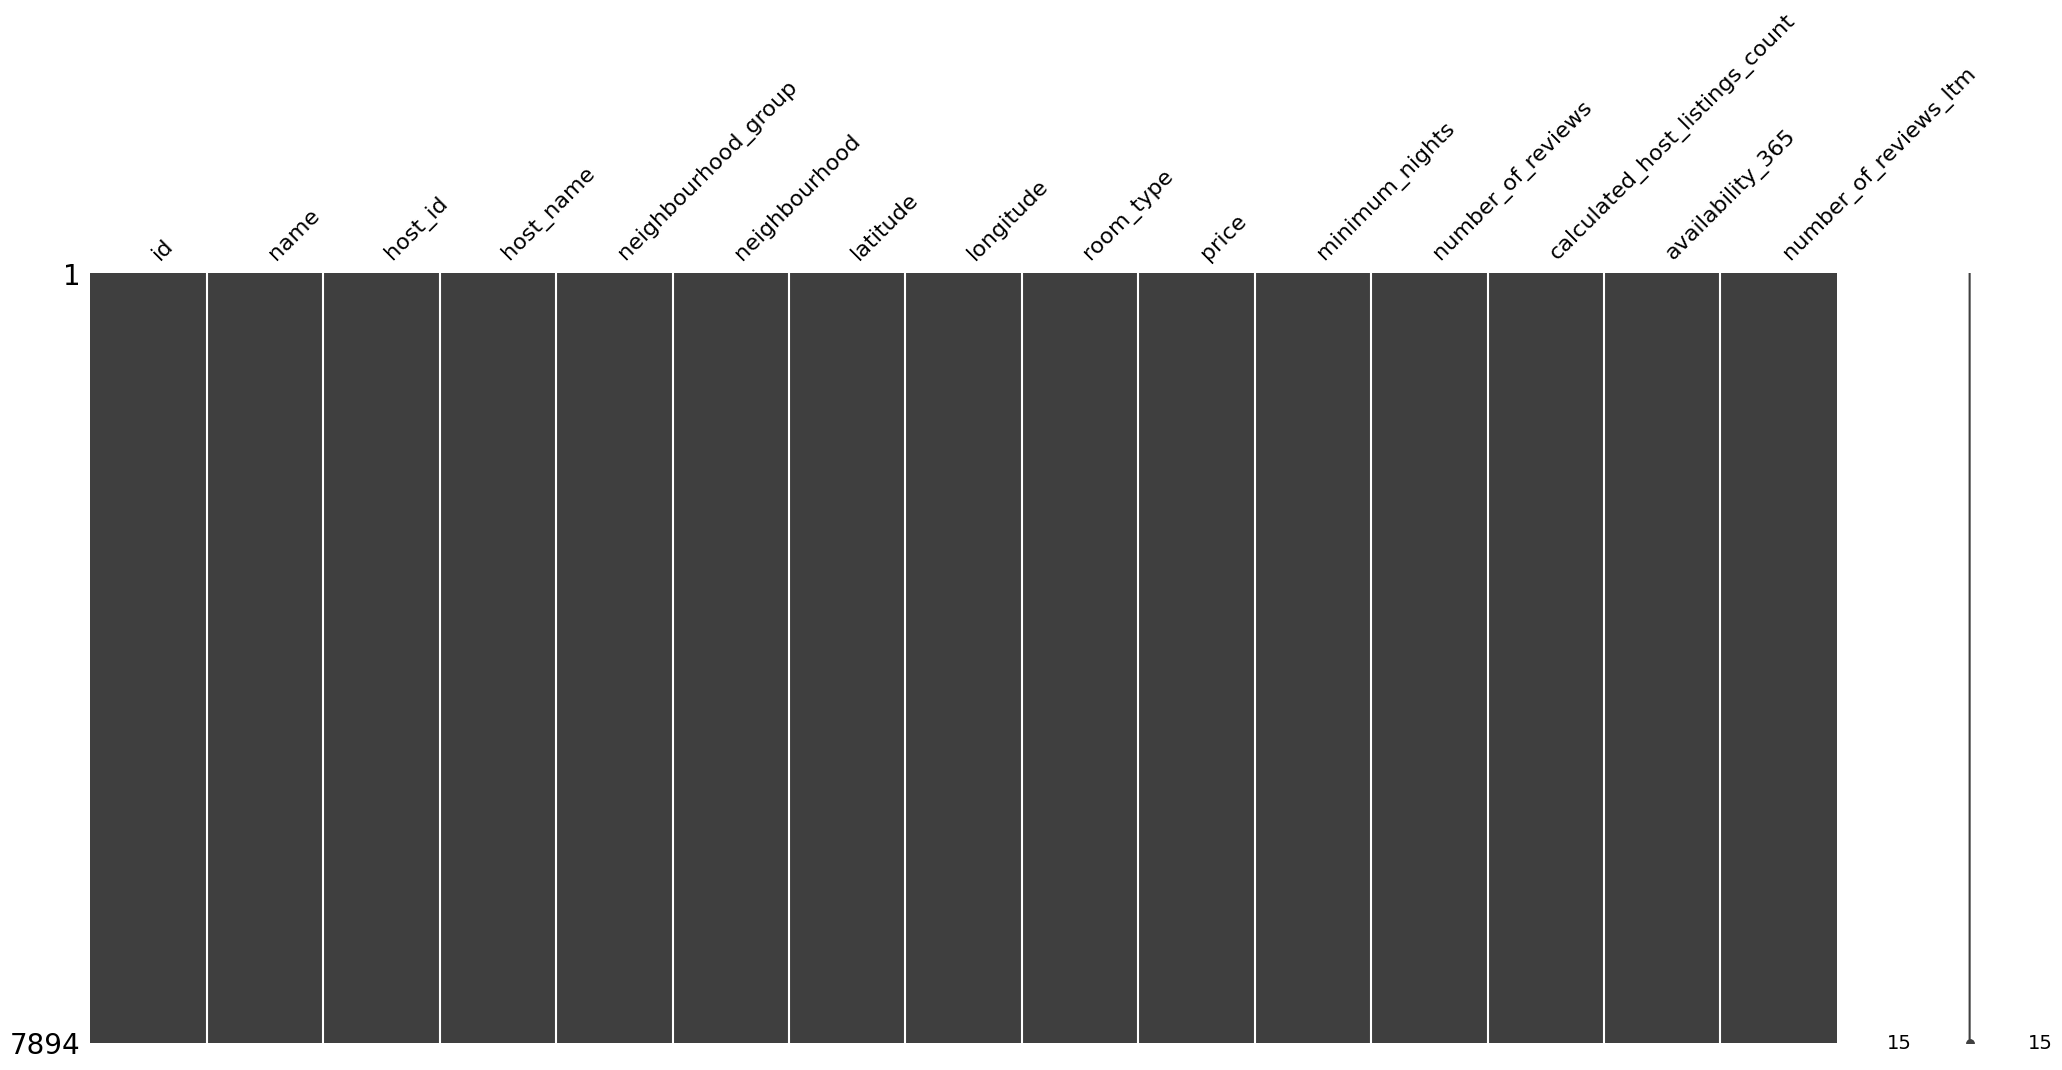

In [16]:
df_clean = df_berlin.copy()

df_clean.drop(df_clean[df_clean.price > 190].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 225].index, axis=0, inplace=True)

print('Shape vor cleaning: ', df_berlin.shape)
print('Shape nach cleaning: ',df_clean.shape)

# drop  Spalte `license`, `reviews_per_month `, `last_review `.
# drop Zeile  `host_name `.

df_clean.drop('license',axis =1,inplace=True)
df_clean.drop('reviews_per_month',axis =1,inplace=True)
df_clean.drop('last_review',axis =1,inplace=True)

df_clean.dropna(inplace=True)
df_clean.isna().sum()

missingno.matrix(df_clean)

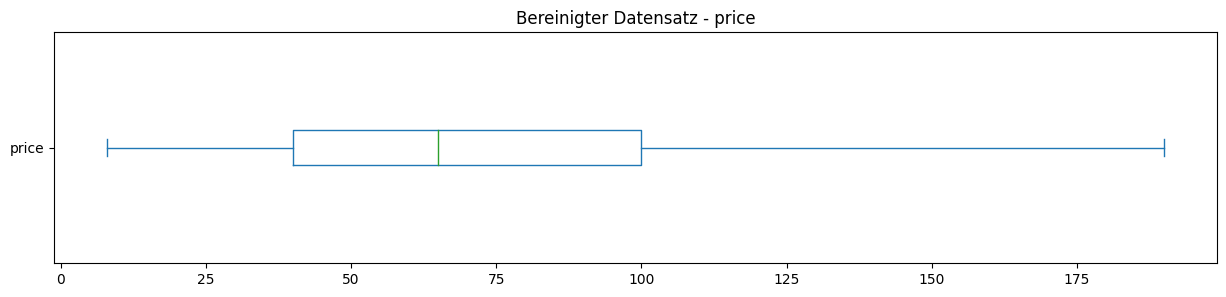

Ursprüngliche Größe: 8996 Zeile
Aktuel Größe: 7894 Zeile


In [17]:
#  Überprüfung des bereinigten Datensatzes

fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Bereinigter Datensatz - price')
plt.show()
print("Ursprüngliche Größe: {} Zeile".format(df_berlin.shape[0]))
print("Aktuel Größe: {} Zeile".format(df_clean.shape[0]))

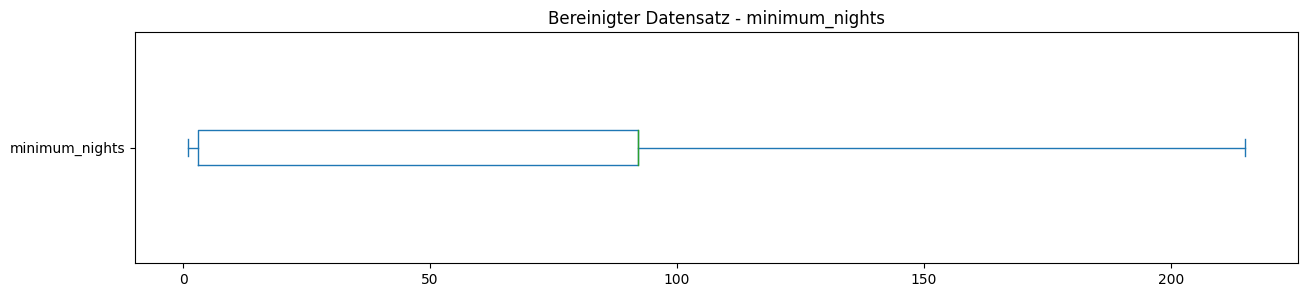

Ursprüngliche Größe: 8996 Zeile
Aktuel Größe: 7894 Zeile


In [18]:
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Bereinigter Datensatz - minimum_nights')
plt.show()
print("Ursprüngliche Größe: {} Zeile".format(df_berlin.shape[0]))
print("Aktuel Größe: {} Zeile".format(df_clean.shape[0]))

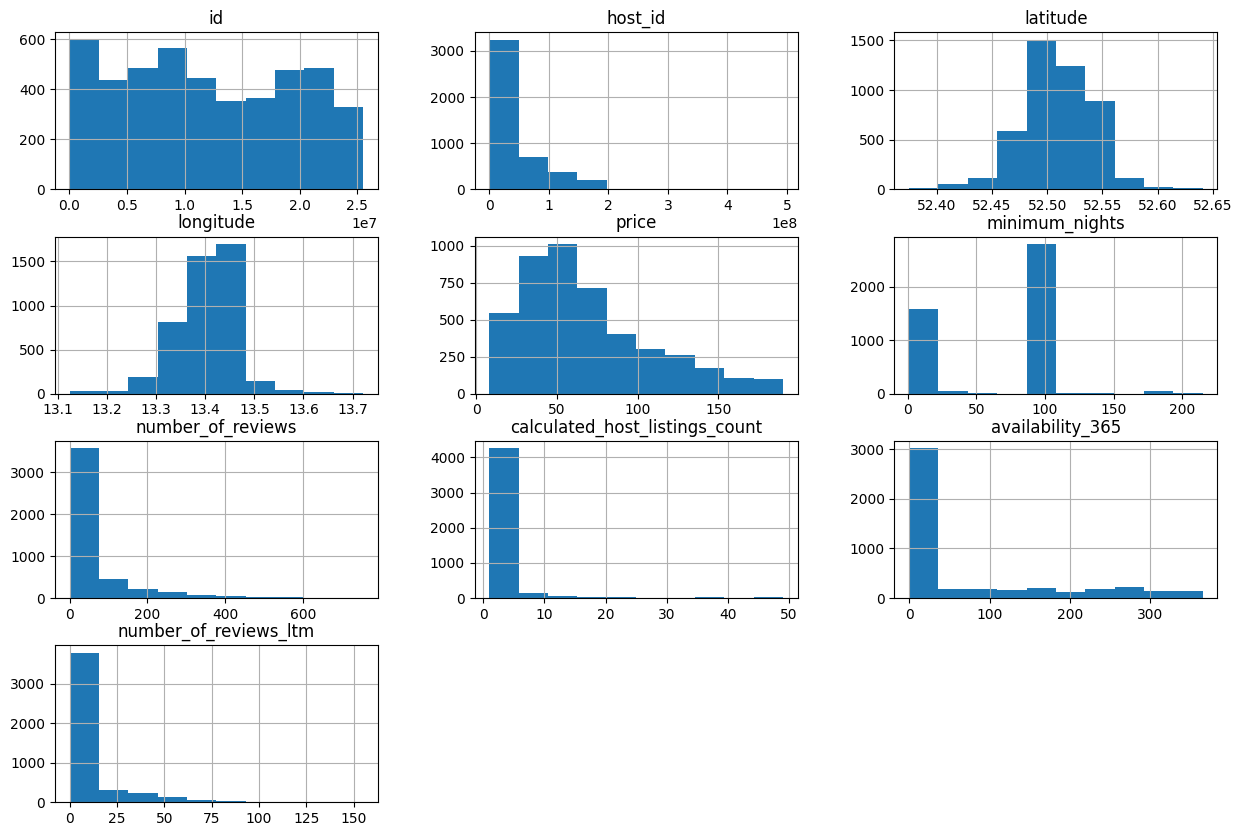

In [ ]:
# Ein Histogramm der numerischen Variablen plotten
df_clean.hist(figsize=(15,10));

### **F4. Welche Korrelation besteht zwischen den Variablen?**

Korrelation bedeutet, dass eine Beziehung zwischen Variablen besteht. In unserem Kontext suchen wir nach einer Beziehung oder Ähnlichkeit zwischen zwei Variablen.

Diese Beziehung kann anhand des Korrelationskoeffizienten gemessen werden und wird deren Intensität festlegen. Um die vorhandenen Korrelationen zwischen den interessierenden Variablen zu identifizieren, werde ich:

* Eine Korrelationsmatrix erstellen
* Ein Heatmap aus dieser Matrix generieren, unter Verwendung der Bibliothek `seaborn`.

In [ ]:
# Eine Korrelationsmatrix erstellen

corr = df_clean[['price', 'minimum_nights',
       'number_of_reviews',
       'calculated_host_listings_count', 'availability_365']].corr()

display(corr)



,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,-0.465630,0.292931,0.151265,0.315814
minimum_nights,-0.465630,1.000000,-0.517349,-0.153875,-0.274782
number_of_reviews,0.292931,-0.517349,1.000000,0.111124,0.361973
calculated_host_listings_count,0.151265,-0.153875,0.111124,1.000000,0.242074
availability_365,0.315814,-0.274782,0.361973,0.242074,1.000000


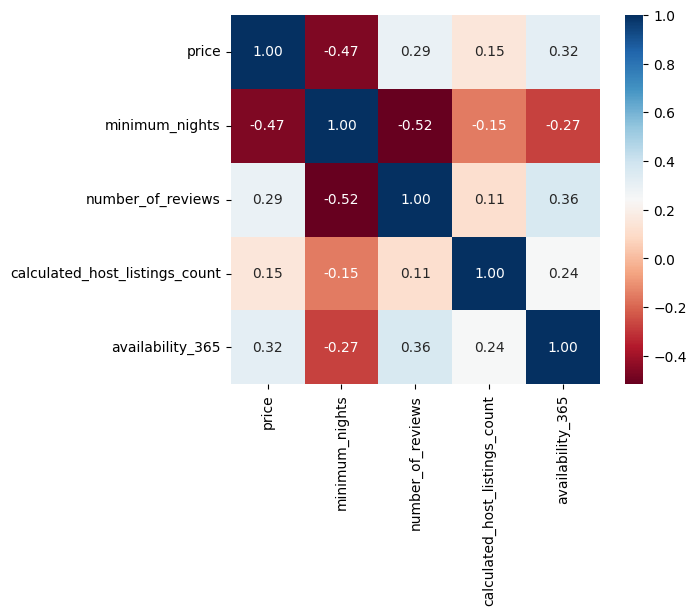

In [ ]:
#  Heatmap für Korrelation
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);




### **Warum ist Multikollinearität ein Problem?**

Multikollinearität ist ein Problem, weil sie die statistische Signifikanz der unabhängigen Variablen verzerrt.

Das Hauptziel der Regression besteht darin, die Beziehung zwischen jeder unabhängigen Variablen und der abhängigen Variablen zu bestimmen. Wenn die Variablen jedoch stark miteinander korreliert sind, ist es möglicherweise nicht mehr möglich, genau festzustellen, welchen Einfluss welche Variable hat. Das bedeutet, dass die p-Werte der Regressionskoeffizienten nicht mehr interpretiert werden können.

Mit Multikollinearität können die Regressionskoeffizienten sich drastisch ändern, wenn die Daten geringfügig geändert werden oder neue Variablen hinzugefügt werden.

- Es besteht eine **negative Korrelation** zwischen den Variablen **'number_of_reviews'** und **'minimum_nights'**, sowie zwischen **'minimum_nights'** und **'price'**.


### **F5. Welche Art von Immobilien wird auf Airbnb am häufigsten vermietet?**

Die Spalte "room_type" gibt den Typ der auf Airbnb angebotenen Unterkunft an. Wenn Sie bereits auf der Website gemietet haben, wissen Sie, dass es Optionen gibt:

1. Ganze Apartments/Häuser / Entire home/apt
2. Nur die Vermietung eines Zimmers / Private room
3. Das Teilen des Zimmers mit anderen Personen / Shared room
Hotel.
4. Hotel

Aus der Grafik können wir erkennen, dass es in Berlin viel mehr Angebote für Wohnungen und ganze Häuser gibt als für jede andere Immobilienart. Gastgeber ziehen es vor, ihr gesamtes Anwesen oder nur ein Zimmer anzubieten. Das lässt sich daraus schließen, dass es sich bei den meisten Inseraten in Berlin um ganze Wohnungen oder nur die Vermietung eines Zimmers  handelt.

Entire home/apt    2663
Private room       1831
Shared room          47
Hotel room            4
Name: room_type, dtype: int64

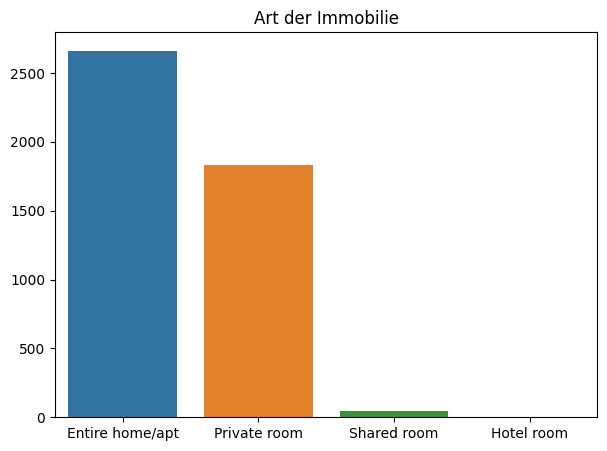

In [ ]:
# Wir werden die Anzahl der Vorkommen jedes Typs der Vermietung zählen, indem wir die Methode value_counts() verwenden."

display(df_clean.room_type.value_counts())

d = df_clean.groupby(by ='room_type').count().id.sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(7,5))
sns.barplot(x=d.index.tolist(), y=d.values, ax=ax)
ax.set_title('Art der Immobilie')
fig.show()




In [ ]:
# Die Prozentsatz der verfügbaren Unterkunftstypen anzeigen:"
df_por = pd.DataFrame(df_clean.room_type.value_counts() / df_clean.shape[0]*100)
display(df_por)


,room_type
Entire home/apt,58.591859
Private room,40.286029
Shared room,1.034103
Hotel room,0.088009


## Wie sind die Unterkünft in den Vierteln verteilt ?

Aus den Diagrammen oben können wir ersehen, dass die meisten Einträge in Kreuzberg, Mitte, Pankow, erscheinen. Dies gibt uns einen guten Einblick in die potenziellen Stadtteile, in denen es eine größere Anzahl von Angeboten gibt.

Indem wir die Anzahl der Angebote und Preise für jedes Viertel analysieren, können wir besser verstehen, in welchen Vierteln gibt es viele teure Angebote. Wenn wir uns die bisher durchgeführte Analyse ansehen, können wir erkennen, dass bestimmte Stadtteile tatsächlich „teurer“ sind als andere.

In [ ]:
# Wie sind die Unterkünft in den Vierteln verteilt?.

lis_sum_t = df_clean[['neighbourhood_group','room_type']]
two_cls = pd.crosstab(lis_sum_t.neighbourhood_group, lis_sum_t.room_type)
two_cls

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Charlottenburg-Wilm.,224,1,127,2
Friedrichshain-Kreuzberg,568,2,480,16
Lichtenberg,64,0,56,0
Marzahn - Hellersdorf,19,0,12,0
Mitte,564,0,337,22
Neukölln,329,0,361,2
Pankow,502,1,213,4
Reinickendorf,27,0,26,0
Spandau,28,0,11,0


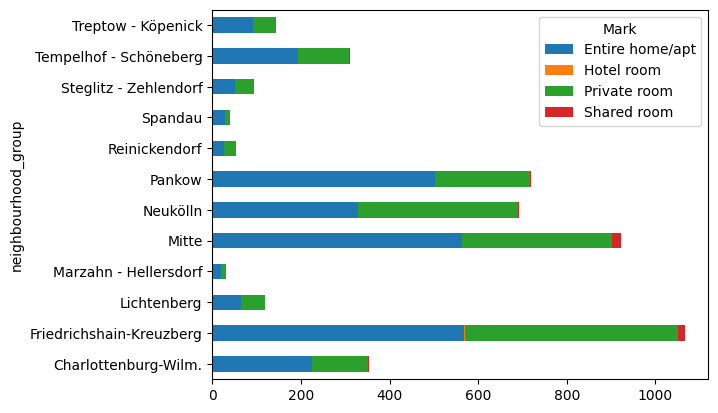

In [ ]:
#pd.pivot_table(df_clean, index="neighbourhood_group", columns="room_type", values='id', aggfunc='count').plot(kind = 'bar');
two_cls.plot.barh(stacked=True)
plt.legend(title='Mark')
plt.show()

## Art der Unterkunft und Preis

- Die Übernachtung bei ein Hotel eindeutige teurer als bei einem ganze Apartmen, die angebote von hotels sind auch viel geringer als die andere Art von Immobilien


room_type
Hotel room         148.904762
Entire home/apt     95.972737
Shared room         60.583333
Private room        55.631184
Name: price, dtype: float64

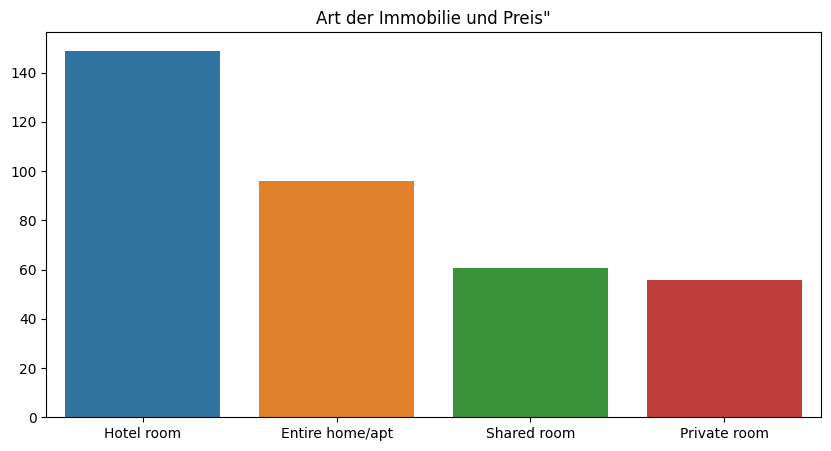

In [ ]:
# Art der Unterkunft und Preis

d = df_clean.groupby('room_type')['price'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x=d.index.tolist(), y=d.values, ax=ax)
ax.set_title('Art der Immobilie und Preis"')
fig.show()
display(d)

In [ ]:
# Die Prozentsatz der verfügbaren Unterkunftstypen anzeigen:"

df_por = pd.DataFrame(df_clean.room_type.value_counts() / df_clean.shape[0]*100)
display(df_por)

,room_type
Entire home/apt,62.006164
Private room,36.060521
Shared room,1.344915
Hotel room,0.588400


### **F6. Was ist der Durchschnittspreis ?"**

Berliner Stadtteile pro Quadratmeterpreis::

1. Mitte (24,26 pro m²),
2. Grunewald (21,14 € pro m²)
3. Charlottenburg (19,21 € pro m²)
4. Moabit (22,76 € pro m²)
5. Marzahn (10,03 € pro m²)
6. Schöneberg (17,09 € pro m²)

Es ist interessant festzustellen, dass Stadtteile wie Müggelheim und Friedrichshagen im Durchschnitt einen höheren Preis haben als Orte wie Mitte und Charlottenburg."

**Das Problem ist, dass wir nur wenige Stichproben aus diesen Stadtteilen haben, und das beeinflusst den Durchschnitt.**



In [ ]:
display(df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False))
print('')
print('Es gibt nur {} Immobilien in Müggelheim.'.format(len(df_clean[df_clean.neighbourhood == 'Müggelheim'])))
print('')
#df_clean[df_clean.neighbourhood == 'Marzahn-Süd'].head


neighbourhood
Müggelheim                119.333333
Friedrichshagen           109.571429
Siemensstadt              106.400000
Rahnsdorf/Hessenwinkel    106.347826
Alexanderplatz            103.741768
                             ...    
Baumschulenweg             51.236842
Allende-Viertel            48.666667
Köpenick-Süd               45.956522
Marzahn-Mitte              38.200000
Hellersdorf-Süd            20.000000
Name: price, Length: 136, dtype: float64


Es gibt nur 9 Immobilien in Müggelheim.



### **F7. Welcher Ort ist im Datensatz am teuersten?**

In [ ]:
grupo_neighbourhood = df_clean.groupby('neighbourhood_group').mean()
grupo_neighbourhood.price.sort_values(ascending=False)[:12]

neighbourhood_group
Charlottenburg-Wilm.        87.008032
Pankow                      85.988506
Mitte                       85.546572
Friedrichshain-Kreuzberg    82.779719
Tempelhof - Schöneberg      82.059289
Treptow - Köpenick          78.280000
Steglitz - Zehlendorf       76.430147
Lichtenberg                 73.097484
Marzahn - Hellersdorf       72.838710
Reinickendorf               72.043716
Spandau                     69.170543
Neukölln                    68.693966
Name: price, dtype: float64

<Axes: title={'center': 'Preisverteilung  (< 60)'}, xlabel='price', ylabel='Density'>

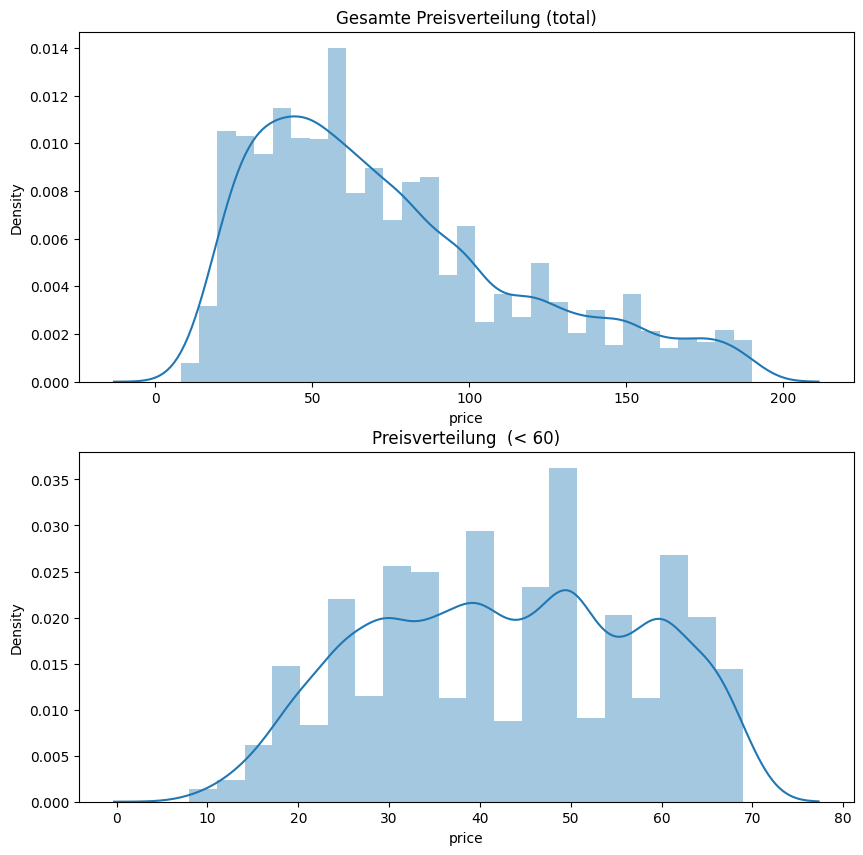

In [20]:
# Gesamte Preisverteilung
# sns.kdeplot(df_clean.price, shade=True, clip=(0, 300),palette='Greens')
# plt.title("Gesamte Preisverteilung Berlin")
# fig.show()

fig, ax= plt.subplots(2,1, figsize=(10,10))

ax[0].set_title("Gesamte Preisverteilung (total)")
sns.distplot(df_clean['price'], kde=True, ax=ax[0])
ax[1].set_title("Preisverteilung  (< 60)")
sns.distplot(df_clean[df_clean['price'] < 70]['price'], kde=True, ax=ax[1])




### **A7. Was ist der Durchschnitt der Mindestaufenthaltsdauer für Mietwohnungen (minimum_nights)?**

Eine Zweitwohnung in Berlin kann maximal 90 Tage im Jahr als Ferienwohnung oder Gästeunterkunft vermietet werden. Das Angebot und die Werbung für Wohnraum müssen immer von der zuständigen Bezirksverwaltung genehmigt werden.

- Der Durchschnitt der Mindestaufenthaltsdauer beträgt 48 Nächte.
- Bei Hotels ist der Durchsnitt 3 Nächte
- Wir können mit sicherreit sagen, dass Airbnb ein Einfluss auf der
Maarktentwicklung hat

Durchschnitt für Übernachtung: 48.1


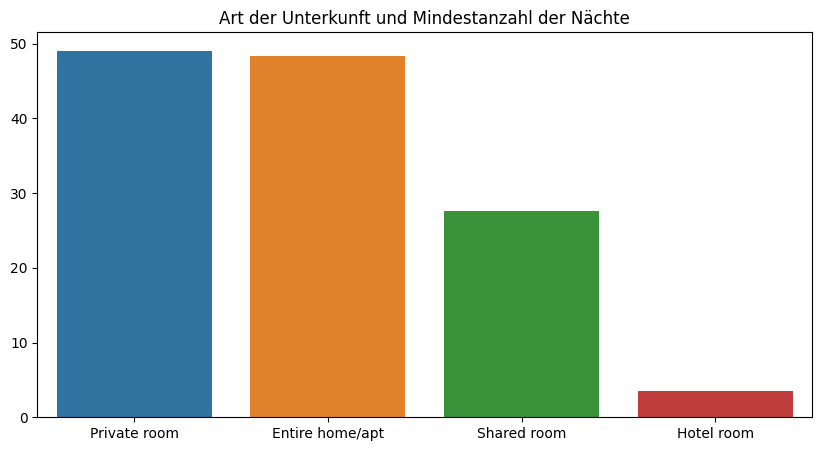

In [ ]:
print('Durchschnitt für Übernachtung: {:.1f}'.format(df_clean.minimum_nights.mean()))

d = df_clean.groupby('room_type')['minimum_nights'].mean().sort_values(ascending=False)
fig, ax= plt.subplots(figsize=(10,5))
sns.barplot(x=d.index.tolist(), y=d.values, ax=ax)
ax.set_title('Art der Unterkunft und Mindestanzahl der Nächte')
fig.show()

In [ ]:
d

room_type
Private room       49.082621
Entire home/apt    48.415876
Shared room        27.576389
Hotel room          3.460317
Name: minimum_nights, dtype: float64

### **F8. Welcher Host hat die meisten Anzeigen?**

- Blueground ist ein Unternehmen aus den Vereinigten Staaten, das möblierte  Apartments vermietet.
- Die anderen Gastgeber scheinen private Anbieter zu sein.
- Der Ort mit den meisten Anzeigen ist Kreuzberg, eine zentrale und bekannte Gegend in Berlin.
- Kreuzberg hat einen Durchschnittspreis von 82 Euro.
- Die am häufigsten angebotene Art der Vermietung ist "Home/Apartment".

In [ ]:
# Der Gastgeber mit den meisten Anzeigen auf der Airbnb-Plattform
top_host = df_clean.host_name.value_counts().head(10)
#setting figure size for future visualizations
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_name', 'host_name':'P_Count'}, inplace=True)
top_host_df

,Host_name,P_Count
0,Blueground,153
1,Michael,84
2,Daniel,72
3,Anna,66
4,Martin,65
5,Jan,60
6,Julia,58
7,Ukio Germany,56
8,Christian,55
9,Selina,54


In [ ]:
#  Welcher Stadtteil hat die meisten Anzeigen und Angebote?
df= df_clean.groupby('neighbourhood_group').count()
df.id.sort_values(ascending=False)[:18]


neighbourhood_group
Friedrichshain-Kreuzberg    2347
Mitte                       2115
Pankow                      1653
Neukölln                    1392
Charlottenburg-Wilm.         996
Tempelhof - Schöneberg       759
Treptow - Köpenick           450
Lichtenberg                  318
Steglitz - Zehlendorf        272
Reinickendorf                183
Spandau                      129
Marzahn - Hellersdorf         93
Name: id, dtype: int64

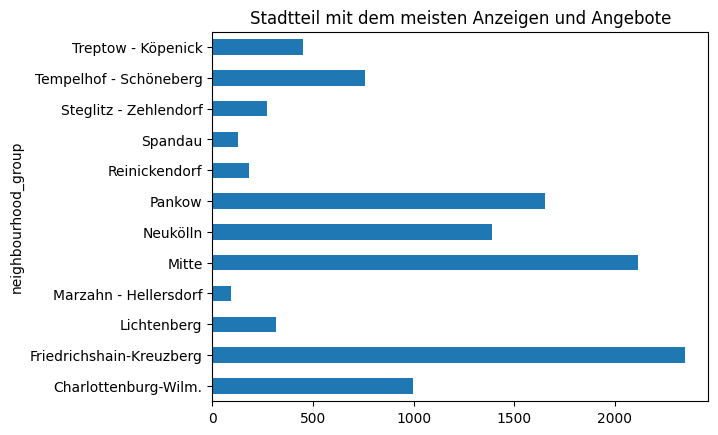

In [ ]:

df_clean.groupby(by="neighbourhood_group").id.count().plot(kind='barh', title="Stadtteil mit dem meisten Anzeigen und Angebote");


###Verteilung der nach Preisen


In [30]:
# Verteilung nach Preisen
df_preise = pd.DataFrame(df_clean['price'].describe())
df_preise

,price
count,7894.000000
mean,74.728148
std,42.515530
min,8.000000
25%,40.000000
50%,65.000000
75%,100.000000
max,190.000000


###Verteilung der Stadtteile nach Preisen

Die Verteilungen sind bemerkenswert ähnlich. Kreuzberg, Neukölln, Mitte und Pankow (zentrale Bezirke) sind in der Spitze, aber das liegt auch an der Anzahl der verfügbaren Mietobjekte. Bei Reinickendorf ist die Kurve sehr flach, es liegt daram, dass nicht viele Angebote auf Airbnb hat. Im Allgemeinen liegen die Spitzen in sehr ähnlichen Gebieten unter 87 €. Was verursacht also die Unterschiede zwischen den Orten tatsächlich?

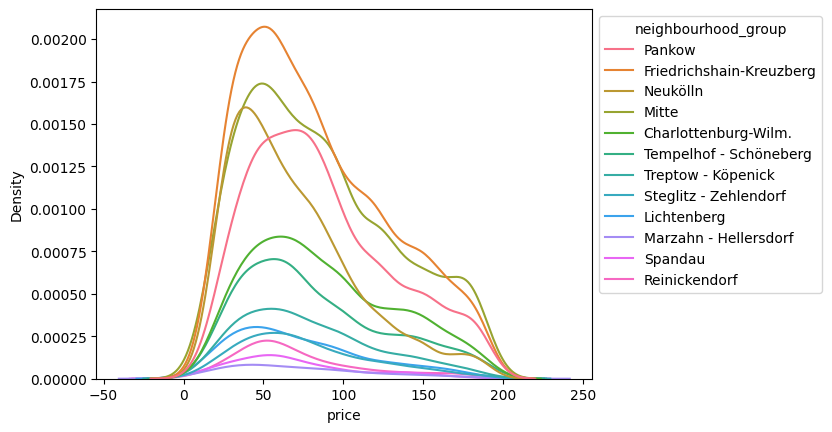

In [ ]:
# Verteilung der Stadtteile nach Preisen

ax = sns.kdeplot(df_clean, x="price", hue="neighbourhood_group")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

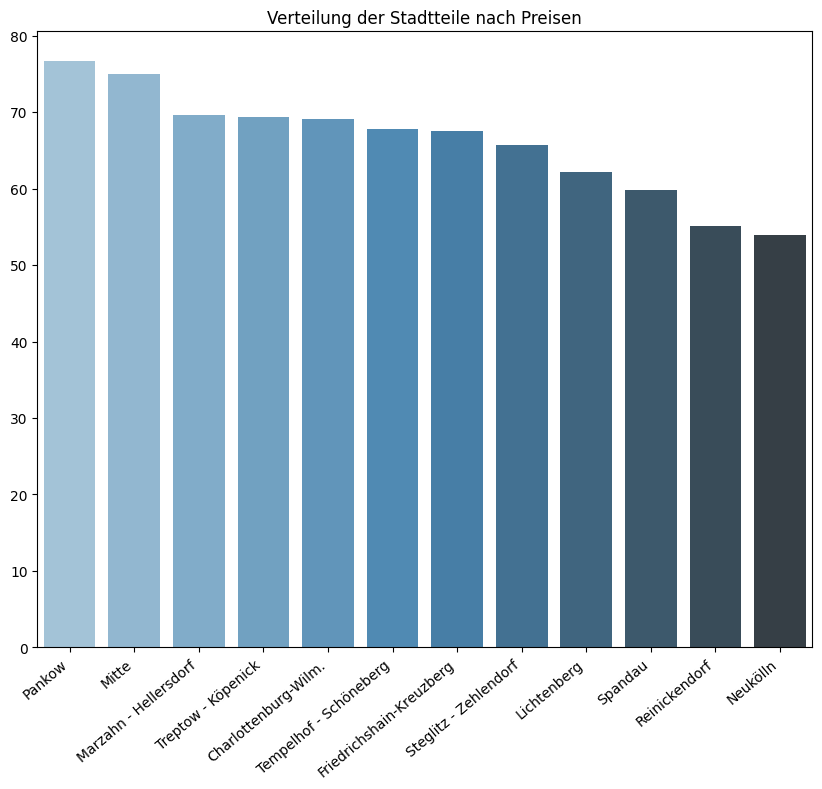

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))

d = df_clean.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)[:18]
sns.barplot(x=d.index.tolist(), y=d.values, ax=ax, palette=("Blues_d"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Verteilung der Stadtteile nach Preisen')

fig.show()

In [ ]:
# Vergleichung der Preisen nach Viertel in Berlin

sub_1=df_clean.loc[df_clean['neighbourhood_group'] == 'Friedrichshain-Kreuzberg']
price_sub1=sub_1[['price']]
# Mitte
sub_2=df_clean.loc[df_clean['neighbourhood_group'] == 'Mitte']
price_sub2=sub_2[['price']]
# Pankow
sub_3=df_clean.loc[df_clean['neighbourhood_group'] == 'Pankow']
price_sub3=sub_3[['price']]
# spandau
sub_4=df_clean.loc[df_clean['neighbourhood_group'] == 'Spandau']
price_sub4=sub_4[['price']]
# Reinickendorf
sub_5=df_clean.loc[df_clean['neighbourhood_group'] == 'Reinickendorf']
price_sub5=sub_5[['price']]
# Spandau
sub_6=df_clean.loc[df_clean['neighbourhood_group'] == 'Marzahn - Hellersdorf']
price_sub6=sub_6[['price']]


price_list_by_n=[price_sub1, price_sub2, price_sub3,price_sub4,price_sub5,price_sub6]

#einer leeren Liste, die wir später mit Preisverteilungen für jede "neighbourhood_group" ergänzen werden.

p_l_b_n_2=[]

#einer Liste mit bekannten Werten in der "neighbourhood_group"-Spalte.

nei_list=['Friedrichshain-Kreuzberg', 'Mitte','Pankow','Spandau','Reinickendorf','Marzahn - Hellersdorf']

#Erstellen einer Schleife, um Statistiken für Preisbereiche zu erhalten und sie unserer leeren Liste hinzuzufügen.

for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[:8]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)



# Ändern der Namen der Preis-Spalte in den Bereichsnamen, um das Lesen der Tabelle zu erleichtern.
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
p_l_b_n_2[5].rename(columns={'price':nei_list[5]}, inplace=True)


# Unser DataFrame für die abschließende Ansicht.

stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df


,Friedrichshain-Kreuzberg,Mitte,Pankow,Spandau,Reinickendorf,Marzahn - Hellersdorf
Stats,,,,,,
count,2347.000000,2115.000000,1653.000000,129.000000,183.000000,93.000000
mean,82.779719,85.546572,85.988506,69.170543,72.043716,72.838710
std,44.787892,46.553761,43.380774,39.306711,39.654944,43.281508
min,8.000000,10.000000,9.000000,11.000000,10.000000,12.000000
25%,48.000000,48.000000,50.000000,44.000000,46.000000,39.000000
50%,75.000000,79.000000,79.000000,59.000000,60.000000,63.000000
75%,115.000000,120.000000,115.000000,90.000000,86.000000,95.000000
max,190.000000,190.000000,190.000000,177.000000,187.000000,189.000000


### Analyse der Anzahl der Einträge in den Stadtteilen

In [ ]:
berlin_lat = df_berlin.latitude.mean()
berlin_long = df_berlin.longitude.mean()
colors = ["#3333DD", "#B00000"]
from folium import plugins
heatmap = folium.Map(location=[berlin_lat, berlin_long], zoom_start=11, tiles='Stamen Toner',)

# plot heatmap
heatmap.add_children(folium.plugins.HeatMap(df_berlin[['latitude', 'longitude']].values, radius=15, cmap='viridis'))
heatmap

### Schlussfolgerungen

1. Die am häufigsten vermietete Art von Immobilien bei Airbnb in Berlin ist die Kategorie "Home/Apartment", die 69% des Marktes ausmacht, gefolgt von der Vermietung eines Zimmers, die 32% des Marktes ausmacht.

2. Die durchschnittliche Miete für eine Wohnung beträgt 95 Euro pro Tag, während für ein Zimmer 60 Euro gezahlt werden können.

3. Die Stadtteile mit dem größten Angebot sind Friedrichshain-Kreuzberg und Mitte. Diese Stadtteile liegen zentral und sind bei Touristen beliebt.

4. Kreuzberg hat einen durchschnittlichen Preis von 82 Euro und die meisten Angebote. Je mehr die Viertel Zentral ist, gibt es mehr Angebote zu mieten. Der durchschnittlicher Preis in Berlin bleit bei unter 75 Euro

5. Es wurde auch festgestellt, dass es in einigen Gegenden nur wenige verfügbare Immobilien gibt, was die statistischen Informationen einiger Merkmale verzerren kann.

6. Die durchschnittliche Mindestaufenthaltsdauer beträgt 48 Nächte. Für Hotels beträgt der Durchschnitt 3 Nächte. Wir können mit sicherreit sagen, dass Airbnb ein Einfluss auf der Maarktentwicklung hat, da weniger in Hotels Übernachtet wird.

7. Blueground ist ein Unternehmen aus den Vereinigten Staaten, das möblierte Apartments vermietet. Blueground ist der größte Eigentümer von Immobilien. Die anderen Gastgeber scheinen private Anbieter zu sein.


Wir haben diese Datensammlung aus verschiedenen Blickwinkeln analysiert und interessante Erkenntnisse gewonnen. Dies kann dem Marketingteam, dem Finanzteam und dem technischen Team von Airbnb bei datenbasierten strategischen Entscheidungen helfen.


In [ ]:
# lis_sum_t = lis_sum[['neighbourhood_group_cleansed', 'room_type']]
# two_cls = pd.crosstab(lis_sum_t.neighbourhood_group_cleansed, lis_sum_t.room_type)
# two_cls

# list_sum_t = df_berlin['neighbourhood','room_type']

lis_sum_t = df_clean[['neighbourhood_group','room_type']]
two_cls = pd.crosstab(lis_sum_t.neighbourhood_group, lis_sum_t.room_type)
two_cls

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood_group,,,,
Charlottenburg-Wilm.,623,15,350,8
Friedrichshain-Kreuzberg,1359,3,952,33
Lichtenberg,195,4,117,2
Marzahn - Hellersdorf,54,0,39,0
Mitte,1374,15,665,61
Neukölln,766,0,610,16
Pankow,1125,13,505,10
Reinickendorf,95,0,85,3
Spandau,80,2,42,5


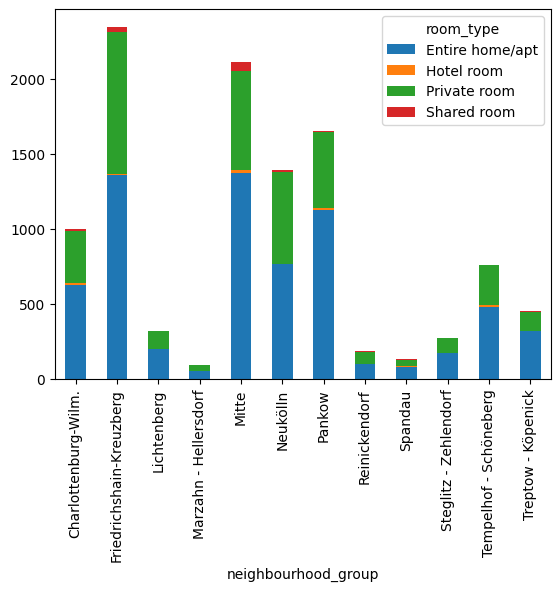

In [ ]:
two_cls.plot.bar(stacked=True)
#plt.legend(title='mark')
plt.show()

(0.0, 500.0)

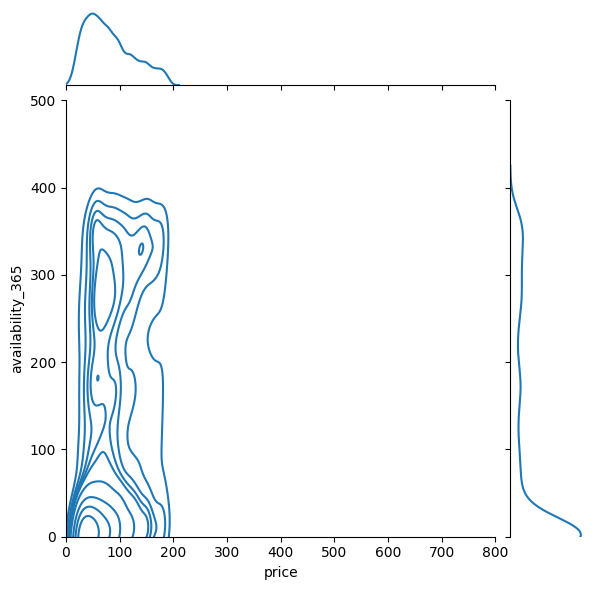

In [ ]:
g = sns.jointplot(x="price", y="availability_365", kind='kde', data=df_clean)

g.ax_marg_x.set_xlim(0, 800)
g.ax_marg_y.set_ylim(0, 500)

In [ ]:
#df[(df.team == 'A') & (df.points >= 15)]
df_clean[(df_clean.neighbourhood_group == 'Friedrichshain-Kreuzberg')]

# Friedrichshain-Kreuzberg
sub_1=df_clean.loc[df_clean['neighbourhood_group'] == 'Friedrichshain-Kreuzberg']
price_sub1=sub_1[['price']]
# Mitte
sub_2=df_clean.loc[df_clean['neighbourhood_group'] == 'Mitte']
price_sub2=sub_2[['price']]
# Pankow
sub_3=df_clean.loc[df_clean['neighbourhood_group'] == 'Pankow']
price_sub3=sub_3[['price']]

sub_4=df_clean.loc[df_clean['neighbourhood_group'] == 'Spandau']
price_sub4=sub_4[['price']]
# Bronx
sub_5=df_clean.loc[df_clean['neighbourhood_group'] == 'Reinickendorf']
price_sub5=sub_5[['price']]
print('ööööö')
print(price_sub5)


print('----')
price_list_by_n=[price_sub1, price_sub2, price_sub3,price_sub4,price_sub5 ]

#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Friedrichshain-Kreuzberg', 'Mitte','Pankow','Spandau','Reinickendorf']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)


for i in p_l_b_n_2:
  print('AAA')
  print(i)
#changing names of the price column to the area name for easier reading of the table
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)

#finilizing our dataframe for final view
stat_df=p_l_b_n_2

stat_df=[df.set_index('Stats') for df in stat_df]
print(stat_df[0])
print('--b')
print(stat_df[0:])
print('LL')
stat_df=stat_df[0].join(stat_df[1:])
stat_df




ööööö
       price
246       33
294       59
354       50
387       65
494       60
...      ...
12172     46
12173     60
12220    106
12347     72
12425     60

[183 rows x 1 columns]
----
AAA
  Stats  price
0   min    8.0
1   25%   48.0
2   50%   75.0
3   75%  115.0
4   max  190.0
AAA
  Stats  price
0   min   10.0
1   25%   48.0
2   50%   79.0
3   75%  120.0
4   max  190.0
AAA
  Stats  price
0   min    9.0
1   25%   50.0
2   50%   79.0
3   75%  115.0
4   max  190.0
AAA
  Stats  price
0   min   11.0
1   25%   44.0
2   50%   59.0
3   75%   90.0
4   max  177.0
AAA
  Stats  price
0   min   10.0
1   25%   46.0
2   50%   60.0
3   75%   86.0
4   max  187.0
       Friedrichshain-Kreuzberg
Stats                          
min                         8.0
25%                        48.0
50%                        75.0
75%                       115.0
max                       190.0
--b
[       Friedrichshain-Kreuzberg
Stats                          
min                         8.0
25%           

,Friedrichshain-Kreuzberg,Mitte,Pankow,Spandau,Reinickendorf
Stats,,,,,
min,8.0,10.0,9.0,11.0,10.0
25%,48.0,48.0,50.0,44.0,46.0
50%,75.0,79.0,79.0,59.0,60.0
75%,115.0,120.0,115.0,90.0,86.0
max,190.0,190.0,190.0,177.0,187.0


In [ ]:
price_sub5.index


Int64Index([  246,   294,   354,   387,   494,   656,   683,   729,  1395,
             1489,
            ...
            11979, 12028, 12053, 12121, 12146, 12172, 12173, 12220, 12347,
            12425],
           dtype='int64', length=183)

In [ ]:
price_sub5

,price
246,33
294,59
354,50
387,65
494,60
...,...
12172,46
12173,60
12220,106
12347,72


In [ ]:
price_sub5.reset_index()

,index,price
0,246,33
1,294,59
2,354,50
3,387,65
4,494,60
...,...,...
178,12172,46
179,12173,60
180,12220,106
181,12347,72


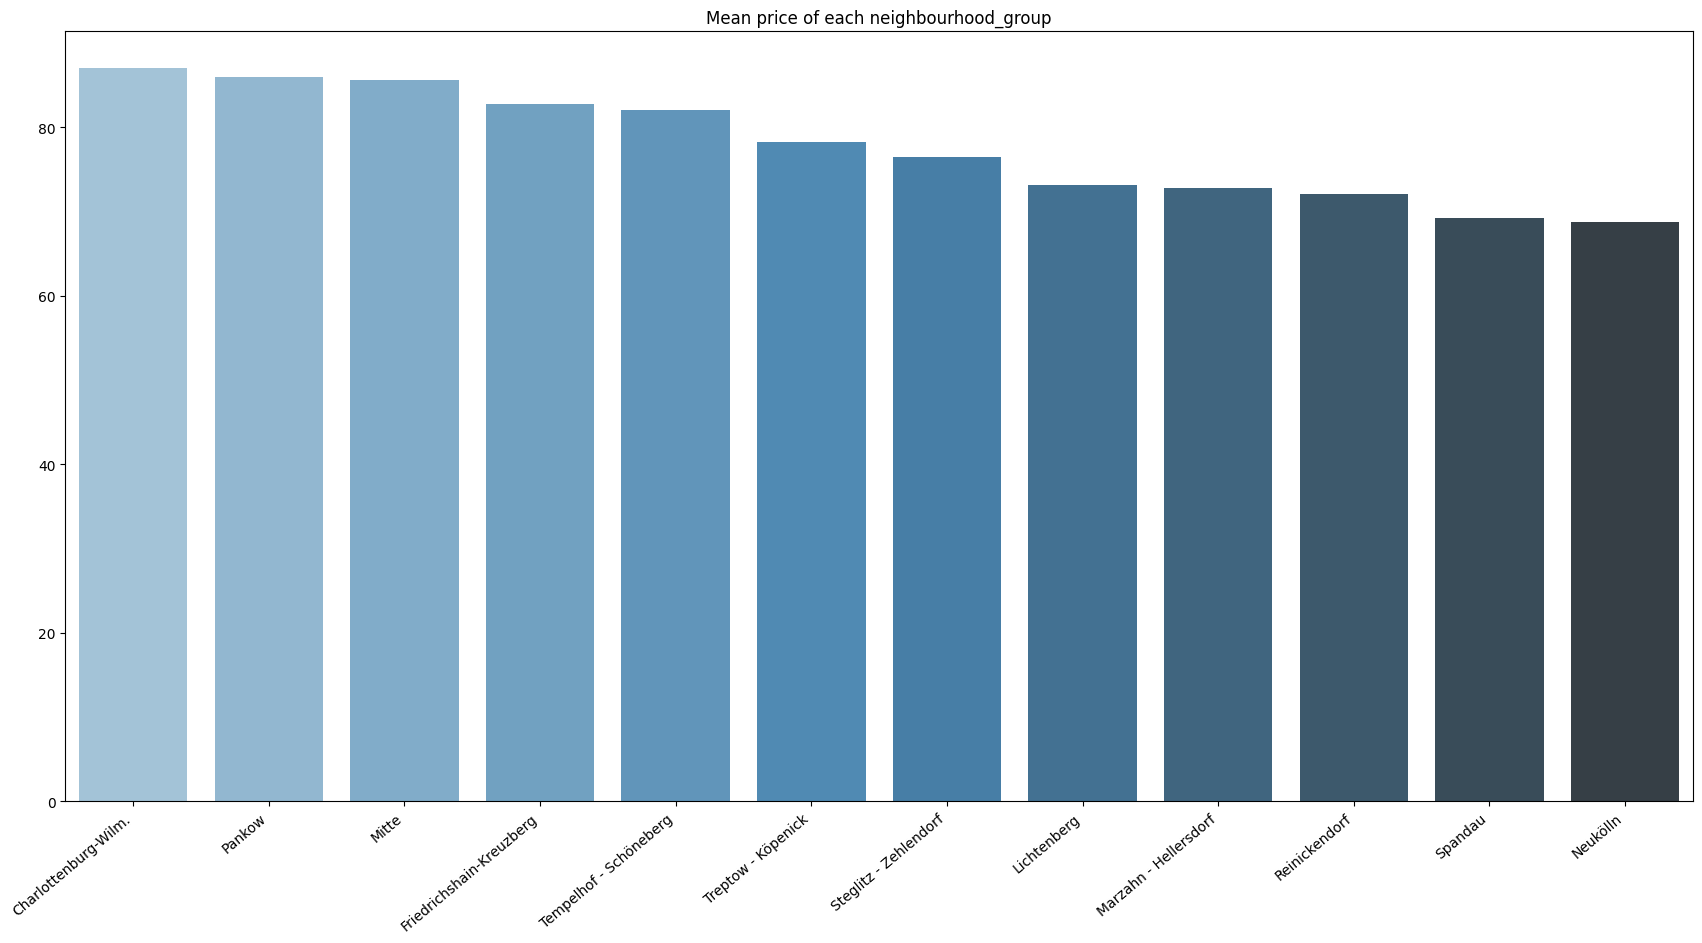

In [ ]:
# remover os *outliers* em um novo DataFrame
# generate count statistics of duplicate entries
# if len(df[df.duplicated()]) > 0:
#     print("No. of duplicated entries: ", len(df[df.duplicated()]))
#     print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
# else:
#     print("No duplicated entries found")

# df.drop_duplicates(inplace=True)

# Identifizieren der Ausreißer für die Variable "price"

fig, ax= plt.subplots(figsize=(21,10))

d = df_clean.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)[:12]
sns.barplot(x=d.index.tolist(), y=d.values, ax=ax, palette=("Blues_d"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Mean price of each neighbourhood_group')

fig.show()

#sns.barplot(x=df.values, y=df.index, alpha=0.8)

In [ ]:
 p_l_b_n_2

[  Stats  Friedrichshain-Kreuzberg
 0   min                       8.0
 1   25%                      48.0
 2   50%                      75.0
 3   75%                     115.0
 4   max                     190.0,
   Stats  Mitte
 0   min   10.0
 1   25%   48.0
 2   50%   79.0
 3   75%  120.0
 4   max  190.0,
   Stats  Pankow
 0   min     9.0
 1   25%    50.0
 2   50%    79.0
 3   75%   115.0
 4   max   190.0,
   Stats  Spandau
 0   min     11.0
 1   25%     44.0
 2   50%     59.0
 3   75%     90.0
 4   max    177.0,
   Stats  Reinickendorf
 0   min           10.0
 1   25%           46.0
 2   50%           60.0
 3   75%           86.0
 4   max          187.0]